In [1]:
!pip install seaborn matplotlib pandas scikit-learn sympy

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------------- 294.9/294.9 kB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   --- ------------------------------------ 0.9/10.9 MB 19.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/10.9 MB 24.8 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.9 MB 29.6 MB/s eta 0:00:01
   --------------------- ------------------ 5.8/10.9 MB 30.8 MB/s eta 0:00:01
   --------------------------- ------------ 7.4/10.9 MB 31.4 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/10.9 MB 30.9 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/10.9 MB 30.3 MB/s eta 0:00:01
   ---------------------------------------  10.9/10.9 MB 31.2 MB/s eta 0:00:01
 

# 5-4

[-1.80365297]
9.283561643835617
[[0.5]
 [0.8]
 [1.1]
 [1.5]]


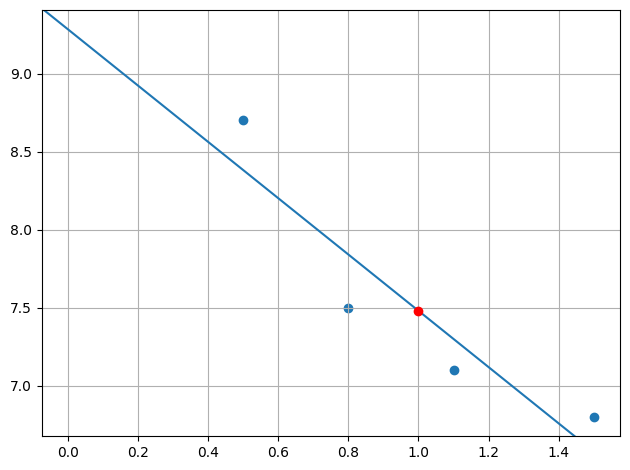

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dict_sample_data = dict(
    x = [.5, .8, 1.1, 1.5],
    y = [8.7, 7.5, 7.1, 6.8]
)

x_pre = 1

df = pd.DataFrame.from_dict(dict_sample_data)

x = df[['x']].to_numpy()
y = df['y'].to_numpy()

my_object = LinearRegression()
model = my_object.fit(x, y)

# 係数の確認
print(model.coef_)

# 切片の確認
print(model.intercept_)

y_pre = model.predict([[x_pre]])

print(x)
plt.scatter(df['x'], df['y'])
plt.axline([0, model.intercept_], slope=model.coef_[0])
plt.plot(x_pre, y_pre[0],marker='o', color='red')
plt.grid(True)
plt.tight_layout()
plt.show()    

# 相関係数の演算

                     housingMedianAge  householdRooms  householdPopulation  \
housingMedianAge             1.000000       -0.153277             0.013191   
householdRooms              -0.153277        1.000000            -0.004852   
householdPopulation          0.013191       -0.004852             1.000000   
medianHouseValue             0.105623        0.151948            -0.023737   
medianIncome                -0.119034        0.326895             0.018766   

                     medianHouseValue  medianIncome  
housingMedianAge             0.105623     -0.119034  
householdRooms               0.151948      0.326895  
householdPopulation         -0.023737      0.018766  
medianHouseValue             1.000000      0.688075  
medianIncome                 0.688075      1.000000  


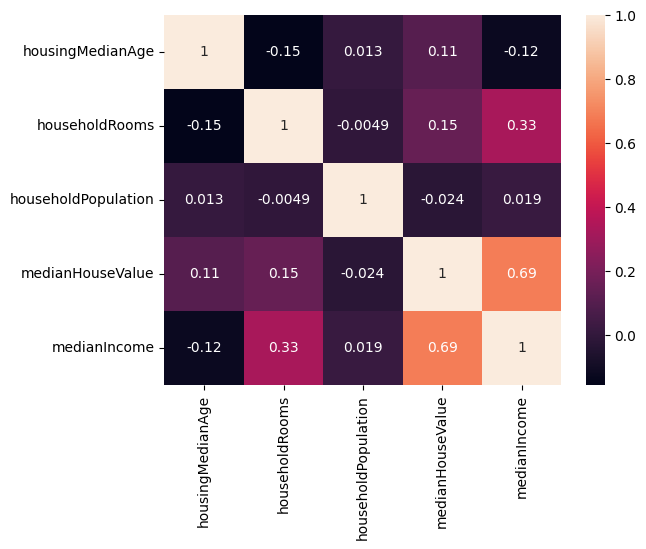

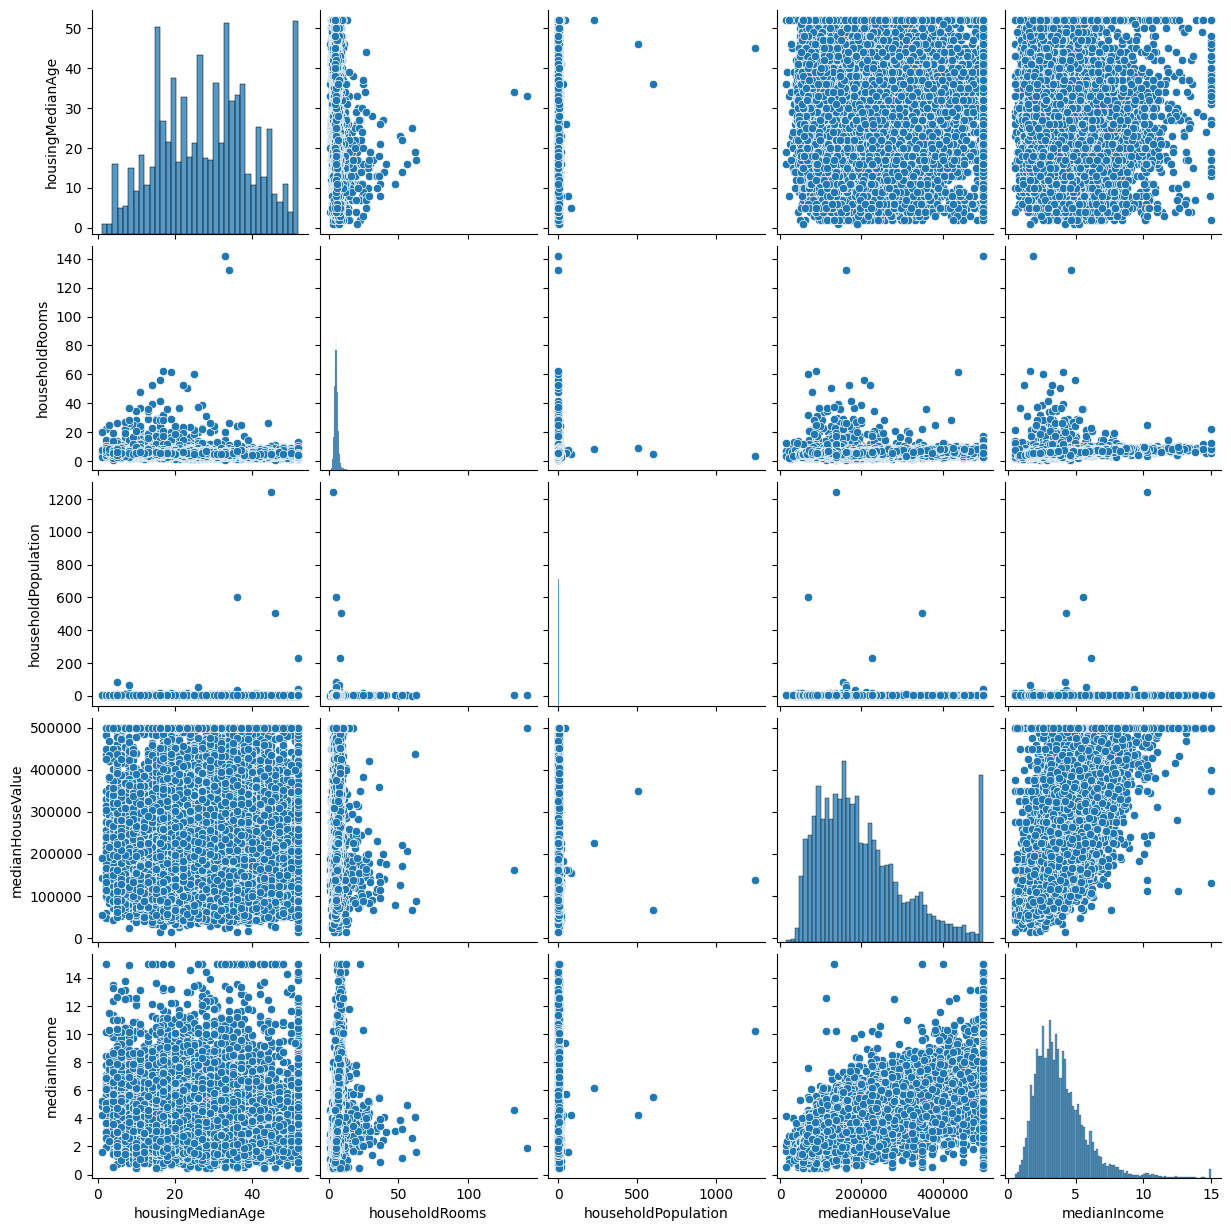

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import itertools

data_file_path = './dataset/cal_housing.data'

df = pd.read_csv(data_file_path, header=None, names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue'])

df['householdRooms'] = df['totalRooms'] / df['households']
df['householdBedrooms'] = df['totalBedrooms'] / df['households']
df['householdPopulation'] = df['population'] / df['households']

df_use = df[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue', 'medianIncome']]

# データフレームの列数を取得
num_columns = df_use.shape[1]
# 列の名前を取得
columns = df_use.columns

# 2つずつの組み合わせを作成
combinations = list(itertools.combinations(range(num_columns), 2))

# 相関係数
corr = df_use.corr()
print(corr)

seaborn.heatmap(corr, annot=True)
seaborn.pairplot(df_use)

# for i, (col1, col2) in enumerate(combinations):
#     plt.figure(figsize=(7, 5))
#     plt.scatter(df.iloc[:, col1], df.iloc[:, col2], marker='o', label=f'{columns[col1]} & {columns[col2]}')
#     plt.title(f'{i} {columns[col1]} & {columns[col2]} {corr.iloc[col1, col2]}')
#     plt.xlabel(f'{columns[col1]}')
#     plt.ylabel(f'{columns[col2]}')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
    
#     # 画像を保存
#     plt.savefig(f'plot/{i}_{columns[col1]}_&_{columns[col2]}.png')
#     plt.close()

# print('save finish')

# 価格 -> 収入 (単回帰)

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data_file_path = './dataset/cal_housing.data'
x_pre = [[200000]]

df = pd.read_csv(data_file_path, header=None, names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue'])

df['householdRooms'] = df['totalRooms'] / df['households']
df['householdBedrooms'] = df['totalBedrooms'] / df['households']
df['householdPopulation'] = df['population'] / df['households']

x = df[['medianHouseValue']].to_numpy()
y = df['medianIncome'].to_numpy()

print(x)
print(y)

my_object = LinearRegression()
model = my_object.fit(x, y)

# 係数の確認
print('係数', model.coef_)
# 切片の確認
print('切片', model.intercept_)

y_pre = model.predict(x_pre)

print('pre', y_pre) 

[[452600.]
 [358500.]
 [352100.]
 ...
 [ 92300.]
 [ 84700.]
 [ 89400.]]
[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]
係数 [1.13281619e-05]
切片 1.5273748109684964
pre [3.7930072]


## 価格 -> 収入 (単回帰 | ライブラリ無し)

In [51]:
x = df[['medianHouseValue', 'medianIncome']]

cov = x.cov()
var = x.var()
mean = x.mean()

print(cov)
print(var)

A = cov.medianHouseValue.medianIncome / var.medianHouseValue
B = mean.medianIncome - A * mean.medianHouseValue
print("傾き", A)
print("切片", B)

                  medianHouseValue   medianIncome
medianHouseValue      1.331615e+10  150847.482793
medianIncome          1.508475e+05       3.609323
medianHouseValue    1.331615e+10
medianIncome        3.609323e+00
dtype: float64
傾き 1.1328161938855784e-05
切片 1.527374810968488


# 築年数, 部屋数, 人数, 金額 -> 収入 (重回帰)

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data_file_path = './dataset/cal_housing.data'
x_pre = [[30, 5, 3, 400000]]

df = pd.read_csv(data_file_path, header=None, names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue'])

df['householdRooms'] = df['totalRooms'] / df['households']
df['householdBedrooms'] = df['totalBedrooms'] / df['households']
df['householdPopulation'] = df['population'] / df['households']

train, test = train_test_split(df)  # 75% train, 25% test

train_x = train[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
train_y = train['medianIncome']

my_object = LinearRegression()
model = my_object.fit(train_x, train_y)

# 係数の確認
print('係数', model.coef_)
# 切片の確認
print('切片', model.intercept_)

test_x = test[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
test_y = test['medianIncome']
score = model.score(test_x, test_y)
print("Score:", score)

y_pre = model.predict(x_pre)
print(y.name , y_pre) 

係数 [-2.41277395e-02  1.73843310e-01  6.72980369e-03  1.11270822e-05]
切片 1.3026931262500607
Score: 0.5301028350013969
medianIncome [5.91909979]


### L1

In [36]:
from sklearn.linear_model import Lasso

x_pre = [[30, 5, 3, 400000]]
alphas = [0.1, 1.0, 10.0]


train, test = train_test_split(df)  # 75% train, 25% test

train_x = train[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
train_y = train['medianIncome']


for alpha in alphas:
    my_object = Lasso(alpha=alpha)
    model = my_object.fit(train_x, train_y)
    print('----- alpha', alpha, "-------")
    
    # 係数の確認
    print('係数', model.coef_)
    # 切片の確認
    print('切片', model.intercept_)

    test_x = test[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
    test_y = test['medianIncome']
    score = model.score(test_x, test_y)
    print("Score:", score)

    y_pre = model.predict(x_pre)
    print(y.name , y_pre) 

----- alpha 0.1 -------
係数 [-2.26643177e-02  1.55000050e-01  5.76237069e-03  1.10403539e-05]
切片 1.3766712642228858
Score: 0.5473096452478485
medianIncome [5.90517065]
----- alpha 1.0 -------
係数 [-2.20684572e-02  0.00000000e+00  0.00000000e+00  1.14921002e-05]
切片 2.125446460986619
Score: 0.5254985138143367
medianIncome [6.06023281]
----- alpha 10.0 -------
係数 [-0.00000000e+00  0.00000000e+00  0.00000000e+00  1.12354251e-05]
切片 1.54649488392252
Score: 0.48614796029140517
medianIncome [6.04066494]


### L2

In [37]:
from sklearn.linear_model import Ridge

x_pre = [[30, 5, 3, 400000]]
alphas = [0.1, 1.0, 10.0]

train, test = train_test_split(df)  # 75% train, 25% test

train_x = train[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
train_y = train['medianIncome']


for alpha in alphas:
    my_object = Ridge(alpha=alpha)
    model = my_object.fit(train_x, train_y)
    print('----- alpha', alpha, "-------")
    
    # 係数の確認
    print('係数', model.coef_)
    # 切片の確認
    print('切片', model.intercept_)

    test_x = test[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
    test_y = test['medianIncome']
    score = model.score(test_x, test_y)
    print("Score:", score)

    y_pre = model.predict(x_pre)
    print(y.name , y_pre) 

----- alpha 0.1 -------
係数 [-2.42830289e-02  1.39754820e-01  6.60535996e-03  1.11212642e-05]
切片 1.4817284659826169
Score: 0.5796477363397448
medianIncome [5.92033345]
----- alpha 1.0 -------
係数 [-2.42830627e-02  1.39753575e-01  6.60535748e-03  1.11212684e-05]
切片 1.4817353294468143
Score: 0.5796475113237018
medianIncome [5.92033477]
----- alpha 10.0 -------
係数 [-2.42834002e-02  1.39741118e-01  6.60533259e-03  1.11213110e-05]
切片 1.4818039570495194
Score: 0.5796452612028263
medianIncome [5.92034795]


# 外れ値除外

In [40]:
import pandas as pd

data_file_path = './dataset/cal_housing.data'

df = pd.read_csv(data_file_path, header=None, names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue'])

df['householdRooms'] = df['totalRooms'] / df['households']
df['householdBedrooms'] = df['totalBedrooms'] / df['households']
df['householdPopulation'] = df['population'] / df['households']

# 標準偏差と平均値の取得
stats = df[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue', 'medianIncome']].agg(['mean', 'std'])

# ±2σの設定
limits = {
    'housingMedianAge': (stats.loc['mean', 'housingMedianAge'] - 2 * stats.loc['std', 'housingMedianAge'],
                 stats.loc['mean', 'housingMedianAge'] + 2 * stats.loc['std', 'housingMedianAge']),
    'householdRooms': (stats.loc['mean', 'householdRooms'] - 2 * stats.loc['std', 'householdRooms'],
                  stats.loc['mean', 'householdRooms'] + 2 * stats.loc['std', 'householdRooms']),
    'householdPopulation': (stats.loc['mean', 'householdPopulation'] - 2 * stats.loc['std', 'householdPopulation'],
                   stats.loc['mean', 'householdPopulation'] + 2 * stats.loc['std', 'householdPopulation']),
    'medianHouseValue': (stats.loc['mean', 'medianHouseValue'] - 2 * stats.loc['std', 'medianHouseValue'],
                 stats.loc['mean', 'medianHouseValue'] + 2 * stats.loc['std', 'medianHouseValue']),
    'medianIncome': (stats.loc['mean', 'medianIncome'] - 2 * stats.loc['std', 'medianIncome'],
                 stats.loc['mean', 'medianIncome'] + 2 * stats.loc['std', 'medianIncome'])
}

# ±2σでカットする
filtered_df = df[(df['housingMedianAge'].between(*limits['housingMedianAge'])) &
                 (df['householdRooms'].between(*limits['householdRooms'])) &
                 (df['householdPopulation'].between(*limits['householdPopulation'])) &
                 (df['medianHouseValue'].between(*limits['medianHouseValue'])) & 
                 (df['medianIncome'].between(*limits['medianIncome']))]

## 相関係数の演算

                     housingMedianAge  householdRooms  householdPopulation  \
housingMedianAge             1.000000       -0.237438             0.016237   
householdRooms              -0.237438        1.000000            -0.060188   
householdPopulation          0.016237       -0.060188             1.000000   
medianHouseValue             0.073172        0.200334            -0.221891   
medianIncome                -0.186473        0.611635            -0.063163   

                     medianHouseValue  medianIncome  
housingMedianAge             0.073172     -0.186473  
householdRooms               0.200334      0.611635  
householdPopulation         -0.221891     -0.063163  
medianHouseValue             1.000000      0.625792  
medianIncome                 0.625792      1.000000  


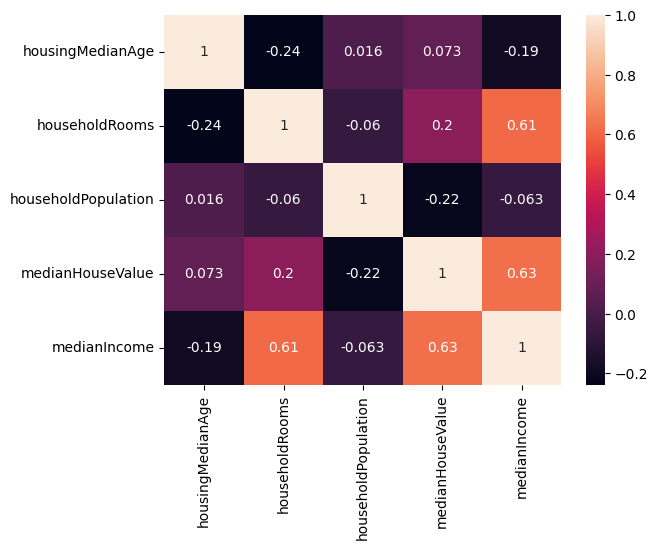

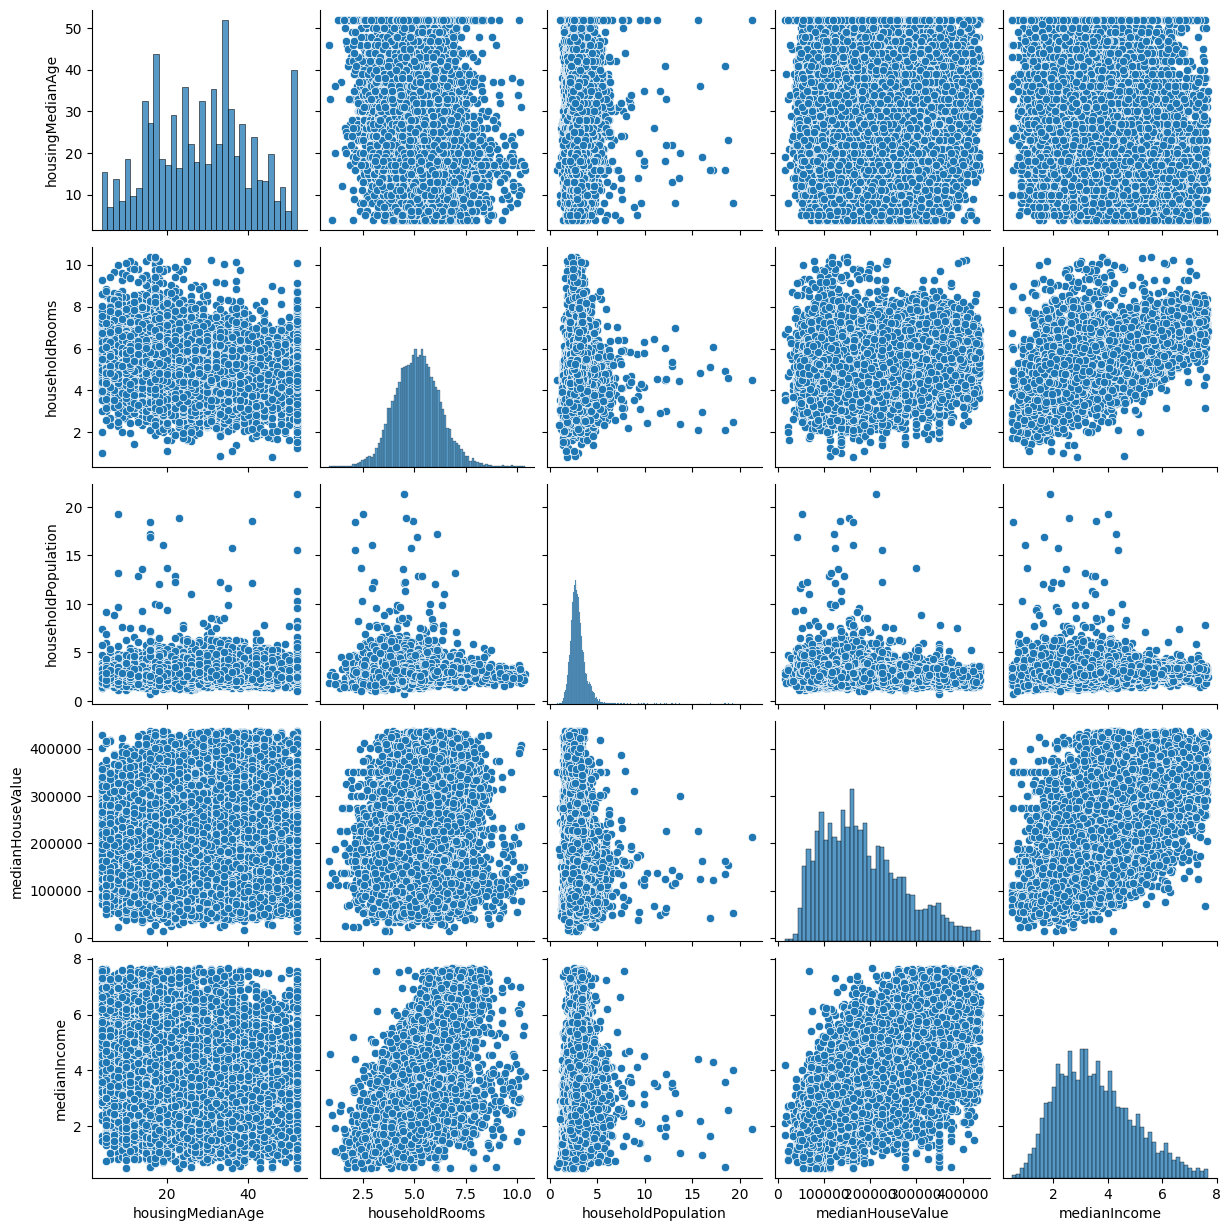

In [42]:
import matplotlib.pyplot as plt
import seaborn
import itertools

df_use = filtered_df[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue', 'medianIncome']]

# データフレームの列数を取得
num_columns = df_use.shape[1]
# 列の名前を取得
columns = df_use.columns

# 2つずつの組み合わせを作成
combinations = list(itertools.combinations(range(num_columns), 2))

# 相関係数
corr = df_use.corr()
print(corr)

seaborn.heatmap(corr, annot=True)
seaborn.pairplot(df_use)

# for i, (col1, col2) in enumerate(combinations):
#     plt.figure(figsize=(7, 5))
#     plt.scatter(df.iloc[:, col1], df.iloc[:, col2], marker='o', label=f'{columns[col1]} & {columns[col2]}')
#     plt.title(f'{i} {columns[col1]} & {columns[col2]} {corr.iloc[col1, col2]}')
#     plt.xlabel(f'{columns[col1]}')
#     plt.ylabel(f'{columns[col2]}')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
    
#     # 画像を保存
#     plt.savefig(f'plot/{i}_{columns[col1]}_&_{columns[col2]}.png')
#     plt.close()

# print('save finish')

## 築年数, 部屋数, 人数, 金額 -> 収入 (重回帰)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_pre = [[30, 5, 3, 400000]]

train, test = train_test_split(filtered_df)  # 75% train, 25% test

train_x = train[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
train_y = train['medianIncome']

my_object = LinearRegression()
model = my_object.fit(train_x, train_y)

# 係数の確認
print('係数', model.coef_)
# 切片の確認
print('切片', model.intercept_)

test_x = test[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
test_y = test['medianIncome']
score = model.score(test_x, test_y)
print("Score:", score)

y_pre = model.predict(x_pre)
print(y.name , y_pre) 

係数 [-1.36827063e-02  5.94293835e-01  1.40500626e-01  8.97618139e-06]
切片 -1.1887448407533538
Score: 0.6446140341550712
medianIncome [5.38421758]


### L1

In [31]:
from sklearn.linear_model import Lasso

x_pre = [[30, 5, 3, 400000]]
alphas = [0.1, 1.0, 10.0]


train, test = train_test_split(filtered_df)  # 75% train, 25% test

train_x = train[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
train_y = train['medianIncome']


for alpha in alphas:
    my_object = Lasso(alpha=alpha)
    model = my_object.fit(train_x, train_y)
    print('----- alpha', alpha, "-------")
    
    # 係数の確認
    print('係数', model.coef_)
    # 切片の確認
    print('切片', model.intercept_)

    test_x = test[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
    test_y = test['medianIncome']
    score = model.score(test_x, test_y)
    print("Score:", score)

    y_pre = model.predict(x_pre)
    print(y.name , y_pre) 

----- alpha 0.1 -------
係数 [-1.49333576e-02  5.08231332e-01  8.82807092e-03  8.81541000e-06]
切片 -0.29644106960818783
Score: 0.6396042611454145
medianIncome [5.34936308]
----- alpha 1.0 -------
係数 [-2.07581909e-02  0.00000000e+00  0.00000000e+00  1.01450636e-05]
切片 2.2750978235907775
Score: 0.44321696927847176
medianIncome [5.71037754]
----- alpha 10.0 -------
係数 [-0.00000000e+00  0.00000000e+00  0.00000000e+00  9.94143555e-06]
切片 1.7185421381291488
Score: 0.3983365734420986
medianIncome [5.69511636]


### L2

In [32]:
from sklearn.linear_model import Ridge

x_pre = [[30, 5, 3, 400000]]
alphas = [0.1, 1.0, 10.0]

train, test = train_test_split(filtered_df)  # 75% train, 25% test

train_x = train[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
train_y = train['medianIncome']


for alpha in alphas:
    my_object = Ridge(alpha=alpha)
    model = my_object.fit(train_x, train_y)
    print('----- alpha', alpha, "-------")
    
    # 係数の確認
    print('係数', model.coef_)
    # 切片の確認
    print('切片', model.intercept_)

    test_x = test[['housingMedianAge','householdRooms','householdPopulation','medianHouseValue']].to_numpy()
    test_y = test['medianIncome']
    score = model.score(test_x, test_y)
    print("Score:", score)

    y_pre = model.predict(x_pre)
    print(y.name , y_pre) 

----- alpha 0.1 -------
係数 [-1.30155971e-02  6.00588373e-01  1.40560736e-01  8.78389219e-06]
切片 -1.2110219384673364
Score: 0.6478686479700513
medianIncome [5.3366911]
----- alpha 1.0 -------
係数 [-1.30163530e-02  6.00554309e-01  1.40548447e-01  8.78396393e-06]
切片 -1.2108014707831058
Score: 0.6478696484912685
medianIncome [5.3367104]
----- alpha 10.0 -------
係数 [-1.30239074e-02  6.00213882e-01  1.40425677e-01  8.78468098e-06]
切片 -1.2085983083284093
Score: 0.6478795653638177
medianIncome [5.33690331]


# test

In [65]:
import sympy

dict_sample_data = dict(
    x = [2, 4, 9],
    y = [3, 7, 11]
)

x = pd.DataFrame.from_dict(dict_sample_data)

cov = x.cov()
var = x.x.var()
mean = x.mean()

x_x = sympy.Symbol('x')
y_y = sympy.Symbol('y')

equ1 = 8*x_x + 7.8*y_y - 60.2
equ2 = 8.7*y_y + 7.8*x_x - 56.72

print('equ', sympy.solve([equ1, equ2]))

print(corr)
print(var)

tes = var

A = cov.x.y / tes
B = mean.y - A * mean.x
print("傾き", A)
print("切片", B)

equ {x: 9.28356164383562, y: -1.80365296803653}
          x         y
x  1.000000  0.970725
y  0.970725  1.000000
13.0
傾き 1.0769230769230769
切片 1.6153846153846159
